In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support

# Data Understanding

## Data Loading

In [47]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

/tmp/ipykernel_9809/1748781244.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


## Univariate Exploratory Data Analysis

### Book Variable

In [48]:
# Melihat detail informasi dari dataset buku
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [49]:
# Mengganti nama kolom agar lebih mudah pada saat pemanggilan data kolom
books.columns = ['ISBN', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher', 'Image_URL_S', 'Image_URL_M', 'Image_URL_L']
books.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Dapat dilihat dari informasi dataset buku diatas bahwa semua tipe data dari setiap kolom tersebut adalah object, tetapi khusus untuk kolom 'Year_Of_Publication' tersebut seharusnya isi nilai dari kolom terseubut berupa nilai yang tipe datanya integer saja, tetapi dari informasi dataset tersebut menunjukkan bahwa tipe data dari kolom Year_Of_Publication' adalah object, maka dari itu perlu ditelusuri lebih lanjut tentang data kolom ini yaitu dengan cara mengubah tipe data dari object menjadi int.

In [50]:
books.Year_Of_Publication = books.Year_Of_Publication.astype('int')

ValueError: invalid literal for int() with base 10: 'DK Publishing Inc'

Terdapat ValueError ketika mencoba mengubah tipe data dari object ke int. Pesan dari error tersebut menunjukkan bahwa terdapat beberapa data dari buku dataset yang memiliki value 'DK Publishing Inc' dari kolom 'Year_Of_Publication'. Maka dari itu, data tersebut harus dihapus dari dataset.

In [51]:
# Melihat data buku dari kolom 'Year_Of_Publication' yang memiliki value 'DK Publishing Inc'
books[books.Year_Of_Publication == 'DK Publishing Inc']

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [52]:
# Menghapus data buku yang memiliki nilai 'DK Publishing Inc' dari kolom 'Year_Of_Publication'
books = books.drop(books[books.Year_Of_Publication == 'DK Publishing Inc'].index)
books[books.Year_Of_Publication == 'DK Publishing Inc']

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L


In [53]:
# Lanjut melakukan casting
books.Year_Of_Publication = books.Year_Of_Publication.astype('int')

ValueError: invalid literal for int() with base 10: 'Gallimard'

Ternyata setelah dilakuan casting lagi, masih ada value yang bukan mengandung tipe data int. Maka proses penghapus data dari langkah sebelumnya harus diulangi lagi

In [54]:
# Melihat data buku dari kolom 'Year_Of_Publication' yang memiliki value 'Gallimard'
books[books.Year_Of_Publication == 'Gallimard']

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [55]:
# Menghapus data buku yang memiliki nilai 'Gallimard' dari kolom 'Year_Of_Publication'
books = books.drop(books[books.Year_Of_Publication == 'Gallimard'].index)
books[books.Year_Of_Publication == 'Gallimard']

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L


In [56]:
# Lanjut melakukan casting
books.Year_Of_Publication = books.Year_Of_Publication.astype('int')

In [57]:
# Melihat detail informasi dari dataset buku lagi
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271357 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271357 non-null  object
 1   Book_Title           271357 non-null  object
 2   Book_Author          271355 non-null  object
 3   Year_Of_Publication  271357 non-null  int64 
 4   Publisher            271355 non-null  object
 5   Image_URL_S          271357 non-null  object
 6   Image_URL_M          271357 non-null  object
 7   Image_URL_L          271357 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.6+ MB


Book_Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64


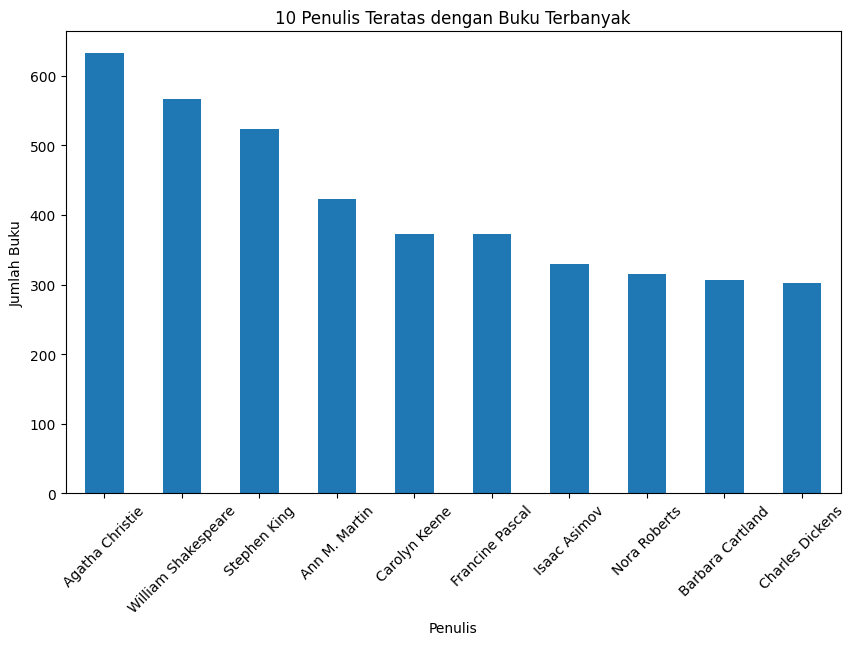

In [58]:
# Menghitung 10 Penulis teratas dengan buku terbanyak
top_10_book_authors = books['Book_Author'].value_counts().head(10)
print(top_10_book_authors)

# Buat diagram batang
plt.figure(figsize=(10, 6))
top_10_book_authors.plot(kind='bar')
plt.title('10 Penulis Teratas dengan Buku Terbanyak')
plt.xlabel('Penulis')
plt.ylabel('Jumlah Buku')
plt.xticks(rotation=45)
plt.show()

Selanjutnya dilakukan pendistribusian data untuk melihat 10 penulis teratas berdasarkan jumlah buku.

### User Variable

In [59]:
# Melihat detail informasi dari dataset user
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [60]:
# Mengganti nama kolom agar lebih mudah pada saat pemanggilan data kolom
users.columns = ['User_ID', 'Location', 'Age']
users.head()

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Dilihat dari detail informasi dataset user tersebut bahwa semua tipe datasetnya normal walaupun tipe data dari age seharusnya int bukan float, tapi masalah tersebut dapat diabaikan. Selain itu kolom age memiliki nilai yang kosong dalam jumlah yang banyak, tetapi hal tersebut dapat diabaikan juga karena model yang saya pakai kedepannya bukan berdasarkan kondisi sosial dari setiap user tersebut.

### Rating Variable

In [61]:
# Melihat detail informasi dari dataset rating
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [62]:
# Mengganti nama kolom agar lebih mudah pada saat pemanggilan data kolom
ratings.columns = ['User_ID', 'ISBN', 'Book_Rating']
ratings.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Dilihat dari detail informasi dataset rating tersebut bahwa semua tipe datasetnya normal dan tidak ada missing value dari semua kolom yang ada pada dataset rating. Tetapi karena jumlah datanya sangat banyak yaitu 1.149.780, maka data tersebut harus dipangkas agar dapat menghemat waktu dalam melakukan training pada model Collaborative Filtering.

In [63]:
collab_ratings = ratings[:25000]
collab_ratings

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
24995,5988,1551661594,0
24996,5990,0060175400,0
24997,5990,0061030430,3
24998,5990,0440221471,0


                                          Book_Title  count
0                                        Wild Animus   2502
4                          The Lovely Bones: A Novel   1295
7                                  The Da Vinci Code    883
8    Divine Secrets of the Ya-Ya Sisterhood: A Novel    732
5                The Red Tent (Bestselling Backlist)    723
2                                    A Painted House    647
3                            The Secret Life of Bees    615
9                             Snow Falling on Cedars    614
1                                Angels &amp; Demons    586
6  Where the Heart Is (Oprah's Book Club (Paperba...    585


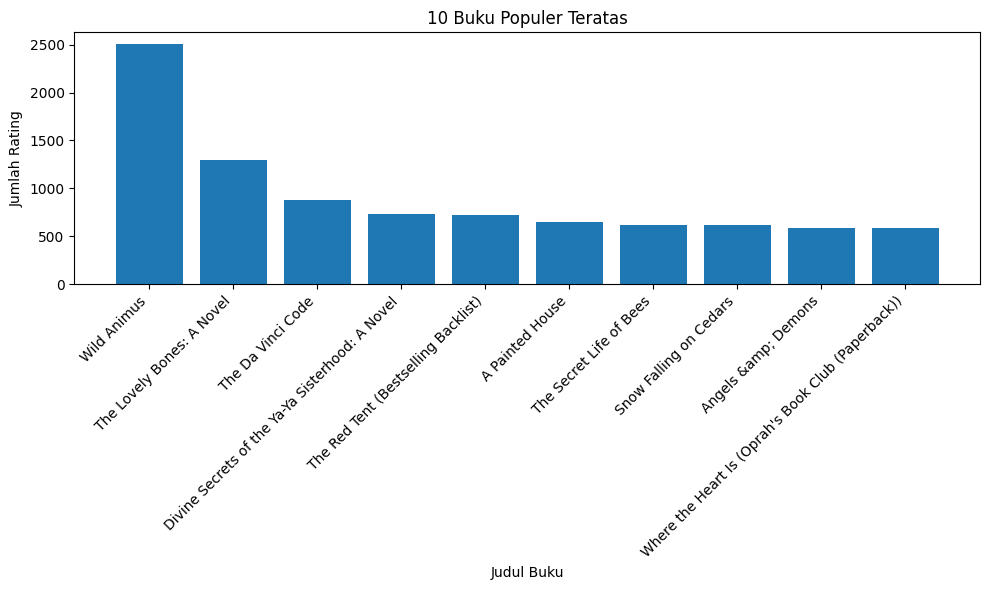

In [72]:
# Menggabungkan data books dan ratings berdasarkan ISBN
temp_books_ratings_df = pd.merge(books, ratings, on='ISBN')

# Menghitung jumlah rating yang didapatkan tiap buku oleh user
count_ratings_book = temp_books_ratings_df['ISBN'].value_counts().head(10)

# Mendapatkan 10 buku populer teratas berdasarkan jumlah peringkat
top_10_popular_books = books[books['ISBN'].isin(count_ratings_book.index)]
top_10_popular_books = top_10_popular_books.drop(labels=['Book_Author', 'Year_Of_Publication', 'Publisher', 'Image_URL_S', 'Image_URL_M', 'Image_URL_L'], axis=1).merge(count_ratings_book, on='ISBN').drop(labels=['ISBN'], axis=1).sort_values(by=['count'], ascending=False)
print(top_10_popular_books)

plt.figure(figsize=(10, 6))
plt.bar(top_10_popular_books['Book_Title'], top_10_popular_books['count'])
plt.title('10 Buku Populer Teratas')
plt.xlabel('Judul Buku')
plt.ylabel('Jumlah Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Selanjutnya dilakukan pendistribusian data untuk melihat 10 buku paling populer dan 10 user paling berpengalaman.

  User_ID  count
0   11676  13602
6  198711   7550
5  153662   6109
3   98391   5891
1   35859   5850
7  212898   4785
9  278418   4533
2   76352   3367
4  110973   3100
8  235105   3067


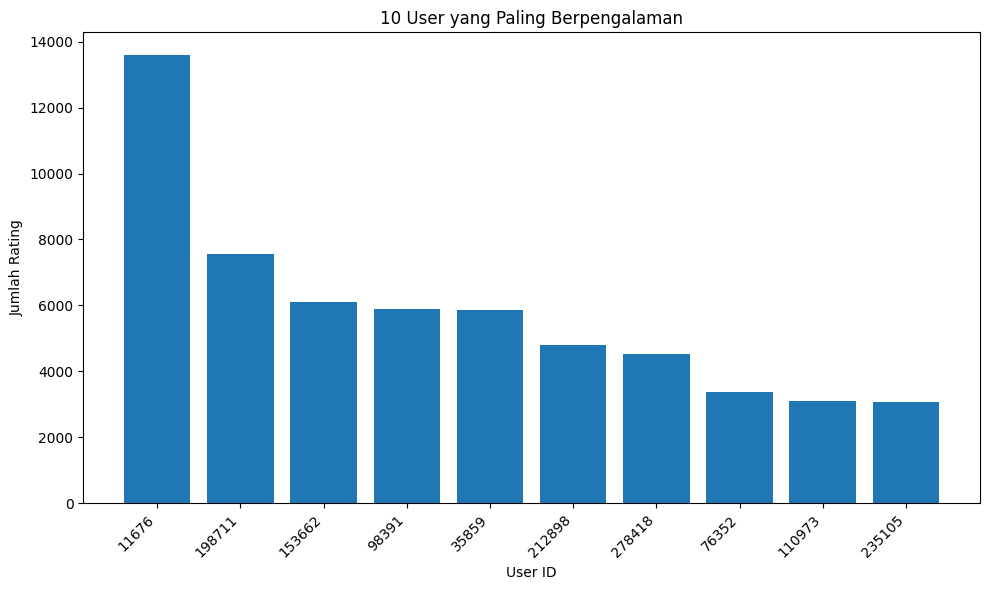

In [85]:
# Menggabungkan data books dan ratings berdasarkan User_ID
temp_users_ratings_df = pd.merge(users, ratings, on='User_ID')

# Menghitung jumlah rating yang diberikan oleh user ke buku
count_ratings_user = temp_users_ratings_df['User_ID'].value_counts().head(10)

# Mendapatkan 10 user yang berpengalaman berdasarkan jumlah peringkat
top_10_experienced_user = users[users['User_ID'].isin(count_ratings_user.index)]
top_10_experienced_user = top_10_experienced_user.drop(labels=['Location', 'Age'], axis=1).merge(count_ratings_user, on='User_ID').sort_values(by=['count'], ascending=False)
top_10_experienced_user.User_ID = top_10_experienced_user.User_ID.astype('str')
print(top_10_experienced_user)

plt.figure(figsize=(10, 6))
plt.bar(top_10_experienced_user['User_ID'], top_10_experienced_user['count'])
plt.title('10 User yang Paling Berpengalaman')
plt.xlabel('User ID')
plt.ylabel('Jumlah Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Data Preparation

## Data Preprocessing

### Menggabungkan Data antara Book dengan Rating

In [ ]:
# Menggabungkan dataframe books dengan dataframe ratings berdasarkan ISBN
new_data = pd.merge(ratings, books, on='ISBN', how='left')

# Print dataframe new_data
new_data

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic,http://images.amazon.com/images/P/0590442449.0...,http://images.amazon.com/images/P/0590442449.0...,http://images.amazon.com/images/P/0590442449.0...


## Data Preparation untuk Model Development Content-Based Filtering

### Mengatasi Missing Value

In [ ]:
# Mengecek missing value pada dataframe new_data
new_data.isnull().sum()

User_ID                     0
ISBN                        0
Book_Rating                 0
Book_Title             118648
Book_Author            118650
Year_Of_Publication    118648
Publisher              118650
Image_URL_S            118648
Image_URL_M            118648
Image_URL_L            118648
dtype: int64

In [ ]:
# Membersihkan missing value dengan fungsi dropna()
all_new_data_clean = new_data.dropna()
all_new_data_clean

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [ ]:
# Mengecek missing value pada dataframe all_new_data_clean
all_new_data_clean.isnull().sum()

User_ID                0
ISBN                   0
Book_Rating            0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
dtype: int64

### Standarisasi Tipe Buku

In [ ]:
# Mengurutkan data buku berdasarkan ISBN kemudian memasukkannya ke dalam variabel fix_data
fix_data = all_new_data_clean.sort_values('ISBN', ascending=True)
fix_data

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...
357256,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
103677,23902,0001046438,9,Liar,Stephen Fry,0.0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...
...,...,...,...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001.0,E P Dutton,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0.0,Digireads.com,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...


In [ ]:
# Mengecek berapa jumlah fix_data berdasarkan kolom 'ISBN'
len(fix_data.ISBN.unique())

270144

In [ ]:
# Membuat variabel preparation yang berisi dataframe fix_data kemudian mengurutkan berdasarkan ISBN
preparation = fix_data
preparation.sort_values('ISBN')

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...
357256,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
103677,23902,0001046438,9,Liar,Stephen Fry,0.0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...
...,...,...,...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001.0,E P Dutton,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0.0,Digireads.com,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...


In [ ]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('ISBN')
preparation

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...
357256,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
103677,23902,0001046438,9,Liar,Stephen Fry,0.0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...
103678,23902,000104687X,6,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...
...,...,...,...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001.0,E P Dutton,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0.0,Digireads.com,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...


In [ ]:
# Mengonversi data series 'ISBN' menjadi dalam bentuk list
isbn = preparation.ISBN.tolist()

# Mengonversi data series 'Book_Title' menjadi dalam bentuk list
book_title = preparation.Book_Title.tolist()

# Mengonversi data series 'Book_Author' menjadi dalam bentuk list
book_author = preparation.Book_Author.tolist()

# Mengonversi data series 'Year_Of_Publication' menjadi dalam bentuk list
year_of_publication = preparation.Year_Of_Publication.tolist()

# Mengonversi data series 'Publisher' menjadi dalam bentuk list
publisher = preparation.Publisher.tolist()

# Mengonversi data series 'Image_URL_S' menjadi dalam bentuk list
image_url_s = preparation.Image_URL_S.tolist()

# Mengonversi data series 'Image_URL_M' menjadi dalam bentuk list
image_url_m = preparation.Image_URL_M.tolist()

# Mengonversi data series 'Image_URL_L' menjadi dalam bentuk list
image_url_l = preparation.Image_URL_L.tolist()

print(len(isbn))
print(len(book_title))
print(len(book_author))
print(len(year_of_publication))
print(len(publisher))
print(len(image_url_s))
print(len(image_url_m))
print(len(image_url_l))

270144
270144
270144
270144
270144
270144
270144
270144


In [ ]:
books_new = pd.DataFrame({
    'isbn': isbn,
    'book_title': book_title,
    'book_author': book_author,
    'year_of_publication': year_of_publication,
    'publisher': publisher,
    'image_url_s': image_url_s,
    'image_url_m': image_url_m,
    'image_url_l': image_url_l

})

books_new

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...
1,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
2,0001046438,Liar,Stephen Fry,0.0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...
3,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...
...,...,...,...,...,...,...,...,...
270139,B000234N76,Falling Angels,Tracy Chevalier,2001.0,E P Dutton,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...
270140,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...
270141,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...
270142,B0002JV9PY,The Blockade Runners,Jules Verne,0.0,Digireads.com,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...


Karena jumlah dataset terlalu besar, dan alokasi memori yang digunakan akan sangat besar untuk memproses seluruh data dalam model development, untuk proyek ini, hanya menggunakan 30.000 data pertama yang akan digunakan.

In [ ]:
# Mengambil 25000 data pertama dari data books_new
books_new = books_new[:25000]

books_new

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...
1,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
2,0001046438,Liar,Stephen Fry,0.0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...
3,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...
...,...,...,...,...,...,...,...,...
24995,0195402863,Okanagan,Hugo Redivo,1978.0,Oxford Univ Pr,http://images.amazon.com/images/P/0195402863.0...,http://images.amazon.com/images/P/0195402863.0...,http://images.amazon.com/images/P/0195402863.0...
24996,019540310X,Exploration Canada,Paul Collins,1979.0,Oxford University Press,http://images.amazon.com/images/P/019540310X.0...,http://images.amazon.com/images/P/019540310X.0...,http://images.amazon.com/images/P/019540310X.0...
24997,0195403843,From Instruction to Delight: An Anthology of C...,P.A. Demers,1982.0,Oxford University Press,http://images.amazon.com/images/P/0195403843.0...,http://images.amazon.com/images/P/0195403843.0...,http://images.amazon.com/images/P/0195403843.0...
24998,0195404645,Sunlight in the shadows: The landscape of Emil...,Emily Carr,1984.0,Oxford University Press,http://images.amazon.com/images/P/0195404645.0...,http://images.amazon.com/images/P/0195404645.0...,http://images.amazon.com/images/P/0195404645.0...


## Data Preparation untuk Model Development Collaborative Filtering dengan Popular Based

### Filter Data Buku Populer

Jumlah data buku yang populer dari dataset adalah sebanyak 50 buku

In [ ]:
# Kelompokan 'new_data' berdasarkan kolom 'Book_Title' dan jumlahkan total rating yang ada berdasarkan kolom 'Book_Rating' tiap judul buku tersebut
book_count_data = new_data.groupby('Book_Title').count()['Book_Rating'].reset_index()

# Ganti judul kolom 'Book_Rating' menjadi 'Count_Rating'
book_count_data.rename(columns={'Book_Rating':'Count_Rating'}, inplace=True)

# Print dataframe book_count_data
book_count_data

,Book_Title,Count_Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241063,Ã?Â?lpiraten.,2
241064,Ã?Â?rger mit Produkt X. Roman.,4
241065,Ã?Â?sterlich leben.,1
241066,Ã?Â?stlich der Berge.,3


In [ ]:
# Kelompokan 'new_data' berdasarkan kolom 'Book_Title' dan hitung rata-rata dari tiap judul buku tersebut berdasarkan rating yang ada dari kolom 'Book_Rating'
book_average_data = new_data.groupby('Book_Title').mean(numeric_only=True)['Book_Rating'].round(2).reset_index()

# Ganti judul kolom 'Book_Rating' menjadi 'Average_Rating'
book_average_data.rename(columns={'Book_Rating':'Average_Rating'}, inplace=True)

# Print dataframe average_rating
book_average_data

,Book_Title,Average_Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00
...,...,...
241063,Ã?Â?lpiraten.,0.00
241064,Ã?Â?rger mit Produkt X. Roman.,5.25
241065,Ã?Â?sterlich leben.,7.00
241066,Ã?Â?stlich der Berge.,2.67


In [ ]:
# Gabungkan data antara count_data dan average_data berdasarkan kolom 'Book_Title'
book_count_average_data = pd.merge(book_count_data, book_average_data, on='Book_Title', how='left')

# Print dataframe count_average_data
book_count_average_data

,Book_Title,Count_Rating,Average_Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
...,...,...,...
241063,Ã?Â?lpiraten.,2,0.00
241064,Ã?Â?rger mit Produkt X. Roman.,4,5.25
241065,Ã?Â?sterlich leben.,1,7.00
241066,Ã?Â?stlich der Berge.,3,2.67


In [ ]:
# Filter dan pilih 50 item yang paling popular berdasarkan rating rata-rata dengan minimal 250 rating dengan jumlah rating yang terbanyak
popular_book_data = book_count_average_data[book_count_average_data['Count_Rating'] >= 250].sort_values('Average_Rating', ascending=False).head(50)

# Print dataframe popular_data
popular_book_data.head(10)

,Book_Title,Count_Rating,Average_Rating
80432,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.85
80420,Harry Potter and the Goblet of Fire (Book 4),387,5.82
80439,Harry Potter and the Sorcerer's Stone (Book 1),278,5.74
80424,Harry Potter and the Order of the Phoenix (Boo...,347,5.50
80412,Harry Potter and the Chamber of Secrets (Book 2),556,5.18
191609,The Hobbit : The Enchanting Prelude to The Lor...,281,5.01
187374,The Fellowship of the Ring (The Lord of the Ri...,368,4.95
80443,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.90
211381,"The Two Towers (The Lord of the Rings, Part 2)",260,4.88
219738,To Kill a Mockingbird,510,4.70


### Filter Data User Berpengalaman

User yang berpengalaman ini dimaksudkan user yang telah memberi rating kepada buku sebanyak 200 buku

In [ ]:
# Kelompokan 'new_data' berdasarkan kolom 'User_ID' dan jumlahkan buku yang pernah diberi rating oleh User berdasarkan kolom 'Book_Rating'
# Hasilnya berupa tipe data Series dengan 'User_ID' sebagai index dan jumlah rating yang pernah diberi sebagai values
user_rating_count = new_data.groupby('User_ID').count()['Book_Rating']

# Print series user_count_data
user_rating_count

User_ID
2          1
7          1
8         18
9          3
10         2
          ..
278846     2
278849     4
278851    23
278852     1
278854     8
Name: Book_Rating, Length: 105283, dtype: int64

In [ ]:
# Buat kondisi boolean dengan membandingkan setiap user yang telah memberi rating dengan 200, yang menghasilkan nilai True/False
# True berarti bahwa User telah memberi rating lebih dari 200 buku, sedangkan False menunjukkan bahwa User memberi rating kurang dari 200 buku
is_experienced_users = user_rating_count > 200

# Print series is_experienced_users
is_experienced_users

User_ID
2         False
7         False
8         False
9         False
10        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book_Rating, Length: 105283, dtype: bool

In [ ]:
# Filter data 'user_rating_count' berdasarkan nilai True, sehingga hanya menghasilkan indeks 'User_ID' dari User yang telah memberi rating lebih dari 200 buku
experienced_users = user_rating_count[is_experienced_users].index

# Print user_count_data
experienced_users

Index([   254,   2276,   2766,   2977,   3363,   3757,   4017,   4385,   6242,
         6251,
       ...
       274004, 274061, 274301, 274308, 274808, 275970, 277427, 277478, 277639,
       278418],
      dtype='int64', name='User_ID', length=899)

In [ ]:
# Filter data 'new_data' yang hanya menyimpan rating dari data 'experienced_users' berdasarkan kolom 'User_ID'
filtered_data = new_data[new_data['User_ID'].isin(experienced_users)]

# Print filtered_data
filtered_data

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
1456,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1457,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995.0,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
1458,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974.0,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1459,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982.0,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
1460,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002.0,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...,...,...
1147612,275970,3829021860,0,The Penis Book,Joseph Cohen,1999.0,Konemann,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...
1147613,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995.0,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...
1147614,275970,896086097,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1147615,275970,9626340762,8,Northanger Abbey (Classic Literature with Clas...,Jane Austen,1996.0,Naxos Audiobooks Ltd.,http://images.amazon.com/images/P/9626340762.0...,http://images.amazon.com/images/P/9626340762.0...,http://images.amazon.com/images/P/9626340762.0...


### Filter Data Buku Berdasarkan Dari Data User Berpengalaman dan Buku Populer

In [ ]:
# Kelompokan 'filtered_data' berdasarkan kolom 'Book_Title' dan jumlahkan buku yang pernah diberi rating oleh User berdasarkan kolom 'Book_Rating'
# Hasilnya berupa tipe data Series dengan 'Book_Title' sebagai index dan jumlah rating yang pernah diberi sebagai values
book_rating_count = filtered_data.groupby('Book_Title').count()['Book_Rating']

# Print series book_rating_count
user_rating_count

User_ID
2          1
7          1
8         18
9          3
10         2
          ..
278846     2
278849     4
278851    23
278852     1
278854     8
Name: Book_Rating, Length: 105283, dtype: int64

In [ ]:
# Buat kondisi boolean dengan membandingkan setiap buku yang telah diberi rating dengan 50, yang menghasilkan nilai True/False
# True berarti bahwa buku telah diberi rating lebih dari 50 rating, sedangkan False menunjukkan bahwa buku diberi rating kurang dari 50 rating
is_popular_book = book_rating_count >= 50

# Print series is_popular_book
is_popular_book

Book_Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    False
 Always Have Popsicles                                                                                        False
 Apple Magic (The Collector's series)                                                                         False
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   False
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                False
                                                                                                              ...  
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           False
Ã?Â?lpiraten.                                                                                                 False
Ã?Â?rger mit Produkt X. Roman.                               

In [ ]:
# Filter data 'book_rating_count' berdasarkan nilai True, sehingga hanya menghasilkan indeks 'Book_Titles' dari buku yang populer
popular_books = book_rating_count[is_popular_book].index

# Print popular_books
popular_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book_Title', length=742)

In [ ]:
# Filter data 'filtered_data' yang hanya menyimpan judul buku dari data 'popular_books' berdasarkan kolom 'User_ID'
final_data = filtered_data[filtered_data['Book_Title'].isin(popular_books)]

# Print final_data
final_data

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
1456,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1469,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999.0,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1471,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002.0,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1474,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1480,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998.0,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1147440,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002.0,Anchor,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...
1147441,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002.0,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...
1147517,275970,1573229725,0,Fingersmith,Sarah Waters,2002.0,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...
1147556,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001.0,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...


### Pivot Dataset

In [ ]:
# Buat tabel pivot untuk mengatur data rating buku
# Tabel pivot akan memiliki buku sebagai baris, user sebagai kolom, dan rating sebagai nilai sel

# Kelompokkan DataFrame 'final_data' berdasarkan 'Book_Title' dan 'User_ID'
# Hitung nilai rata-rata untuk setiap kombinasi buku dan user
# Tabel yang dihasilkan akan memiliki buku sebagai baris dan user sebagai kolom
pivot_data = final_data.pivot_table(index='Book_Title', columns='User_ID', values='Book_Rating')

# Print pivot_data
pivot_data

User_ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book_Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
# Isi nilai yang hilang di tabel pivot_data dengan angka nol
pivot_data.fillna(0, inplace=True)

# Print pivot_data
pivot_data

User_ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book_Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Preparation untuk Model Development Collaborative Filtering dengan User Based

### Encoding User ID

In [ ]:
# Mengubah User_ID menjadi list tanpa nilai yang sama
user_ids = collab_ratings.User_ID.unique().tolist()
print('List User_ID: ', user_ids)

# Melakukan encoding User_ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('Encoded User_ID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke User_ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('Encoded Angka ke User_ID: ', user_encoded_to_user)

List User_ID:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 

### Encoding ISBN

In [ ]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
isbn_ids = collab_ratings.ISBN.unique().tolist()
print('List ISBN: ', isbn_ids)

# Melakukan proses encoding ISBN
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_ids)}
print('Encoded ISBN : ', isbn_to_isbn_encoded)

# Melakukan proses encoding angka ke ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_ids)}
print('Encoded Angka ke ISBN: ', isbn_encoded_to_isbn)

List ISBN:  ['034545104X', '0155061224', '0446520802', '052165615X', '0521795028', '2080674722', '3257224281', '0600570967', '038550120X', '342310538', '0425115801', '0449006522', '0553561618', '055356451X', '0786013990', '0786014512', '0060517794', '0451192001', '0609801279', '0671537458', '0679776818', '0943066433', '1570231028', '1885408226', '0747558167', '3442437407', '033390804X', '3596218098', '0684867621', '0451166892', '8440682697', '034544003X', '0380000059', '0380711524', '0451167317', '0451454952', '0843920262', '3404122879', '3404182928', '3404611306', '342662429', '3426690179', '3442424216', '3442425573', '3453092007', '3453157745', '3453176944', '3453185137', '3453185323', '3453213025', '3453877241', '3492226604', '3517017442', '3596125006', 'B0000BLD7X', 'N3453124715', '9029716894', '9057868059', '0140279091', '0553572369', '0571058086', '3499230933', '3596151465', '0099543818', '3404147723', '3423111321', '3442136644', '3492232000', '8434811634', '8484330478', '8484332

### Mapping

In [ ]:
# Mapping User_ID ke dataframe user
collab_ratings['user'] = collab_ratings.User_ID.map(user_to_user_encoded)

# Mapping placeID ke dataframe book_title
collab_ratings['book_title'] = collab_ratings.ISBN.map(isbn_to_isbn_encoded)

/tmp/ipykernel_7339/4076753041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collab_ratings['user'] = collab_ratings.User_ID.map(user_to_user_encoded)
/tmp/ipykernel_7339/4076753041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collab_ratings['book_title'] = collab_ratings.ISBN.map(isbn_to_isbn_encoded)


In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)

# Mendapatkan jumlah book_titles
num_book_titles = len(isbn_to_isbn_encoded)

# Mengubah rating menjadi nilai float
collab_ratings.Book_Rating = collab_ratings.Book_Rating.values.astype(np.float32)

# Nilai minimum rating
min_rating = min(collab_ratings.Book_Rating)

# Nilai maksimal rating
max_rating = max(collab_ratings.Book_Rating)

print('Number of Users: {}\nNumber of Books: {}\nMin Rating: {}\nMax Rating: {}'.format(
    num_users, num_book_titles, min_rating, max_rating
))

Number of Users: 3003
Number of Books: 20833
Min Rating: 0.0
Max Rating: 10.0


/tmp/ipykernel_7339/643319443.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collab_ratings.Book_Rating = collab_ratings.Book_Rating.values.astype(np.float32)


# Modeling

## Model Development Content-Based Filtering

### TF-IDF Vectorizer

In [ ]:
data_content = books_new
data_content.sample(5)

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
24443,0193532271,100 Carols for Choirs,David Willcocks,1988.0,Oxford University Press,http://images.amazon.com/images/P/0193532271.0...,http://images.amazon.com/images/P/0193532271.0...,http://images.amazon.com/images/P/0193532271.0...
18500,0140302050,Last Battle,C S Lewis,0.0,Penguin Putnam~childrens Hc,http://images.amazon.com/images/P/0140302050.0...,http://images.amazon.com/images/P/0140302050.0...,http://images.amazon.com/images/P/0140302050.0...
18643,0140320741,Laura Ingalls Wilder: Growing Up in the Little...,Patricia Reilly Giff,1988.0,Puffin Books,http://images.amazon.com/images/P/0140320741.0...,http://images.amazon.com/images/P/0140320741.0...,http://images.amazon.com/images/P/0140320741.0...
8121,0060971975,Voyager,Jeana Yeager,1989.0,Harpercollins,http://images.amazon.com/images/P/0060971975.0...,http://images.amazon.com/images/P/0060971975.0...,http://images.amazon.com/images/P/0060971975.0...
8466,0061000256,America's Most Wanted: How Television Catches ...,Jack Breslin,1990.0,Harpercollins,http://images.amazon.com/images/P/0061000256.0...,http://images.amazon.com/images/P/0061000256.0...,http://images.amazon.com/images/P/0061000256.0...


In [ ]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data book_author
tf.fit(data_content['book_author'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['00146', '008', '046', ..., 'zweifel', 'zwinger', 'â¼nter'],
      dtype=object)

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data_content['book_author'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(25000, 9913)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan nama pengarang
# Baris diisi dengan nama buku

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data_content.book_title
).sample(20, axis=1).sample(10, axis=0)

,kiley,elward,aird,ingram,herber,grothe,cowley,junger,thurston,tebbel,jaber,edugyan,woodford,malone,cullen,dryden,suto,bronowski,hoffer,partridge
book_title,,,,,,,,,,,,,,,,,,,,
"The concise Oxford dictionary of music,",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fortune,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Penguin Encyclopedia of Popular Music (Penguin Reference Books.),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Mary, Bloody Mary: A Young Royals Book",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Buy Wholesale by Mail 2001: The Consumer's Bible to Shopping Online, by Mail, by Phone",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Him With His Foot in His Mouth: And Other Stories (Penguin Twentieth-Century Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Hoe Lot of Trouble : A Nina Quinn Mystery (Nina Quinn Mysteries),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Jewish War (Penguin Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
French for oral and written review,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity

In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim_content = cosine_similarity(tfidf_matrix)
cosine_sim_content

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul buku
cosine_sim_df = pd.DataFrame(cosine_sim_content, index=data_content['book_title'], columns=data_content['book_title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap judul buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (25000, 25000)


book_title,DEENIE,"Shaw's \Saint Joan\"" (Passnotes S.)""",Bevis (World's Classics),I Love This Game!: My Life and Baseball,Imperial Earth
book_title,,,,,
Early Childhood Development: A Multicultural Perspective (3rd Edition),0.0,0.0,0.0,0.0,0.0
Searoad: Chronicles of Klatsand,0.0,0.0,0.0,0.0,0.0
The Gospel According to Jesus Christ,0.0,0.0,0.0,0.0,0.0
Really Learn 100 Phrasal Verbs,0.0,0.0,0.0,0.0,0.0
Striking Out,0.0,0.0,0.0,0.0,0.0
Yanomamo: The Fierce People (Case Studies in Cultural Anthropology),0.0,0.0,0.0,0.0,0.0
Freedom Just Around the Corner : A New American History: 1585-1828,0.0,0.0,0.0,0.0,0.0
"Banished Children of Eve, A Novel of Civil War New York",0.0,0.0,0.0,0.0,0.0
Women as mothers,0.0,0.0,0.0,0.0,0.0


### Mendapatkan Rekomendasi

In [ ]:
def book_recommendations(judul_buku, similarity_data=cosine_sim_df, items=data_content[['book_title', 'book_author', 'image_url_l']], k=5):
    """
    Rekomendasi Buku berdasarkan kemiripan dataframe

    Parameter:
    ---
    judul_buku : tipe data string (str)
                Judul Buku (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan buku sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,judul_buku].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(judul_buku, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
test_judul_buku = 'The Foxman'

data_content[data_content.book_title.eq(test_judul_buku)]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
18773,0140343113,The Foxman,Gary Paulsen,1990.0,Puffin Books,http://images.amazon.com/images/P/0140343113.0...,http://images.amazon.com/images/P/0140343113.0...,http://images.amazon.com/images/P/0140343113.0...


In [ ]:
# Mendapatkan rekomendasi buku yang mirip dengan 'Mistaken Identity'
book_recommendations(test_judul_buku)

,book_title,book_author,image_url_l
0,Dogsong,Gary Paulsen,http://images.amazon.com/images/P/0140322353.0...
1,Tiltawhirl John,Gary Paulsen,http://images.amazon.com/images/P/0140343121.0...
2,The Beet Fields (Definitions S.),Gary Paulsen,http://images.amazon.com/images/P/0099439654.0...
3,Hatchet,Gary Paulsen,http://images.amazon.com/images/P/0027701301.0...
4,Hatchet,Gary Paulsen,http://images.amazon.com/images/P/014032724X.0...


## Model Development Collaborative Filtering dengan Popular Based

### Cosine Similarity

In [ ]:
# menghitung kemiripan antar vektor menggunakan metode yang disebut kesamaan kosinus.
cosine_sim_collab = cosine_similarity(pivot_data)

### Mendapatkan Rekomendasi

In [ ]:
def recommend_book(book_name):
    # Temukan indeks nama buku dari variabel input 'book_name' di tabel pivot
    index = np.where(pivot_data.index == book_name)[0][0]

    # Mengambil skor similarity buku masukan dengan buku lain,
    # urutkan dalam urutan descending, dan pilih 4 item yang sama teratas
    similar_items = sorted(list(enumerate(cosine_sim_collab[index])), key=lambda x: x[1], reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []

        # Mengambil detail buku yang relevan (judul, penulis, URL gambar) dari kumpulan data 'buku'
        temp_df = books[books['Book_Title'] == pivot_data.index[i[0]]]

        item.extend(list(temp_df.drop_duplicates('Book_Title')['Book_Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book_Title')['Book_Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book_Title')['Image_URL_L'].values))

        data.append(item)

    return data

In [ ]:
temp_data = new_data.drop(labels=['User_ID', 'Book_Rating'], axis=1).drop_duplicates('ISBN')

test_buku = 'You Belong To Me'
temp_data[temp_data.Book_Title.eq(test_buku)]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
14438,0671004549,You Belong To Me,Mary Higgins Clark,1999.0,Pocket Books,http://images.amazon.com/images/P/0671004549.0...,http://images.amazon.com/images/P/0671004549.0...,http://images.amazon.com/images/P/0671004549.0...


In [ ]:
recommend_book('You Belong To Me')

[['Loves Music, Loves to Dance',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671758896.01.LZZZZZZZ.jpg'],
 ["I'll Be Seeing You",
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671888587.01.LZZZZZZZ.jpg'],
 ['Before I Say Good-Bye',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671004573.01.LZZZZZZZ.jpg'],
 ["Daddy's Little Girl",
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0743206045.01.LZZZZZZZ.jpg']]

## Model Development Collaborative Filtering dengan User Based

### Membagi Data untuk Training dan Validasi

In [ ]:
# Mengacak dataset
collab_ratings = collab_ratings.sample(frac=1, random_state=42)
collab_ratings

,User_ID,ISBN,Book_Rating,user,book_title
6868,278418,0553231758,0.0,678,6475
24016,5582,0425176304,10.0,2836,20159
9668,92,8445071769,8.0,891,9052
13640,1848,0441328091,0.0,1485,12215
14018,2012,0425157164,0.0,1543,12524
...,...,...,...,...,...
21575,4320,8484509850,0.0,2414,18361
5390,278418,0373121962,0.0,678,5066
860,277087,8472230082,5.0,139,850
15795,2442,8804320095,0.0,1706,13939


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan book_title menjadi satu value
x = collab_ratings[['user', 'book_title']].values

# Membuat variabel y untuk membuat rating dari hasil
y = collab_ratings.Book_Rating.apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 90% data train dan 10% data validasi
train_indices = int(0.9 * collab_ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[  678  6475]
 [ 2836 20159]
 [  891  9052]
 ...
 [  139   850]
 [ 1706 13939]
 [ 2804 19921]] [0.  1.  0.8 ... 0.5 0.  0.7]


### Proses Training

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_book_title, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book_title = num_book_title
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_book_title,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_book_title, 1) # layer embedding resto bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)

    x = dot_user_resto + user_bias + resto_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_book_titles, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100


1407/1407 [==============================] - 22s 15ms/step - loss: 0.6364 - root_mean_squared_error: 0.4041 - val_loss: 0.5905 - val_root_mean_squared_error: 0.3753
Epoch 2/100
1407/1407 [==============================] - 16s 11ms/step - loss: 0.5372 - root_mean_squared_error: 0.3495 - val_loss: 0.5607 - val_root_mean_squared_error: 0.3599
Epoch 3/100
1407/1407 [==============================] - 16s 11ms/step - loss: 0.5127 - root_mean_squared_error: 0.3358 - val_loss: 0.5409 - val_root_mean_squared_error: 0.3508
Epoch 4/100
1407/1407 [==============================] - 23s 16ms/step - loss: 0.4934 - root_mean_squared_error: 0.3250 - val_loss: 0.5299 - val_root_mean_squared_error: 0.3461
Epoch 5/100
1407/1407 [==============================] - 24s 17ms/step - loss: 0.4796 - root_mean_squared_error: 0.3164 - val_loss: 0.5228 - val_root_mean_squared_error: 0.3427
Epoch 6/100
1407/1407 [==============================] - 18s 13ms/step - loss: 0.4686 - root_mean_squared_error: 0.3096 - val_l

### Mendapatkan Rekomendasi

In [ ]:
book_df = books_new

# Mengambil sample user
user_id = collab_ratings.User_ID.sample(1).iloc[0]
book_readed_by_user = collab_ratings[collab_ratings.User_ID == user_id]

book_not_readed = book_df[~book_df['isbn'].isin(book_readed_by_user.ISBN.values)]['isbn']
book_not_readed = list(
    set(book_not_readed)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)

book_not_readed = [[isbn_to_isbn_encoded.get(x)] for x in book_not_readed]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_readed), book_not_readed)
)

In [ ]:
ratings_collab_model = model.predict(user_book_array).flatten()

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)

top_book_user = (
    book_readed_by_user.sort_values(
        by = 'Book_Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]
book_rating_from_user_data = []
for row in book_df_rows.itertuples():
  book_rating_from_user_data.append([row.book_title, row.book_author])

df_book_rating_from_user = pd.DataFrame(book_rating_from_user_data, columns=['Book Title', 'Book Author'])
print(df_book_rating_from_user)

print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)

top_ratings_indices = ratings_collab_model.argsort()[-10:][::-1]
recommended_book_ids = [
    isbn_encoded_to_isbn.get(book_not_readed[x][0]) for x in top_ratings_indices
]

recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)]
recommend_book_data = []
for row in recommended_book.itertuples():
  recommend_book_data.append([row.book_title, row.book_author, row.image_url_l])

df_recommend_book_data = pd.DataFrame(recommend_book_data, columns=['Book Title', 'Book Author', 'Image'])
df_recommend_book_data

 1/47 [..............................] - ETA: 0s

47/47 [==============================] - 0s 960us/step
Showing recommendations for users: 3363
Book with high ratings from user
--------------------------------
                                          Book Title  Book Author
0                                    Getting Over It  Anna Maxted
1  Princess in the Spotlight (The Princess Diarie...    Meg Cabot
--------------------------------
Top 10 book recommendation
--------------------------------


,Book Title,Book Author,Image
0,Small Wonder: Essays,Barbara Kingsolver,http://images.amazon.com/images/P/0060504072.0...
1,To the Heart of the Nile : Lady Florence Baker...,Pat Shipman,http://images.amazon.com/images/P/0060505559.0...
2,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0060935464.0...
3,American Pie : A Novel,Michael Lee West,http://images.amazon.com/images/P/0060984333.0...
4,Joke,Milan Kundera,http://images.amazon.com/images/P/0140096922.0...
5,Sociolinguistics: An Introduction to Language ...,Peter Trudgill,http://images.amazon.com/images/P/0140289216.0...
6,The Grapes of Wrath: John Steinbeck Centennial...,John Steinbeck,http://images.amazon.com/images/P/0142000663.0...
7,Last Watch Of The Night: Essays Too Personal a...,Paul Monette,http://images.amazon.com/images/P/0151000719.0...
8,The Whale Rider,Witi Ihimaera,http://images.amazon.com/images/P/0152050167.0...
9,The Pilgrim's Progress (The World's Classics),John Bunyan,http://images.amazon.com/images/P/0192816071.0...


# Evalution

## Model Evaluasi dengan Content-Based Filtering

In [ ]:
# Menentukan threshold untuk mengkategorikan kesamaan sebagai 1 atau 0
threshold = 0.5

# Buat data ground_truth dengan asumsi threshold
ground_truth_content = np.where(cosine_sim_content >= threshold, 1, 0)

# Menampilkan beberapa sampel nilai ground_truth_content_df dalam matriks
ground_truth_content_df = pd.DataFrame(ground_truth_content, index=data_content['book_title'], columns=data_content['book_title']).sample(5, axis=1).sample(10, axis=0)
ground_truth_content_df

book_title,Letters to Sir William Temple (Penguin Classics),The Sound and The Fury,Paddy's Lament: Ireland 1846-47,Old Yeller,The stalking lamb
book_title,,,,,
Stand By Your Man : A Novel,0,0,0,0,0
Belle and the Beau (An Avon True Romance),0,0,0,0,0
Home Truths: A Novella,0,0,0,0,0
Man to Die for,0,0,0,0,0
Men's Fitness Magazine's Complete Guide to Health and Well-Being,0,0,0,0,0
Dangling Man (Penguin Twentieth-Century Classics),0,0,0,0,0
Turning Seventeen #5: Can't Let Go (Turning Seventeen),0,0,0,0,0
Spoken in Darkness,0,0,0,0,0
Level Three Leadership: Getting Below the Surface,0,0,0,0,0


In [ ]:
# Mengambil sebagian kecil dari matriks cosine_sim_content dan matriks kebenaran dasar
sample_size = 10000
cosine_sim_sample_content = cosine_sim_content[:sample_size, :sample_size]
ground_truth_sample_content = ground_truth_content[:sample_size, :sample_size]

# Mengonversi matriks sample cosine similarity menjadi array satu dimensi untuk perbandingan
cosine_sim_flat_content = cosine_sim_sample_content.flatten()

# Mengonversi matriks sample ground truth menjadi array satu dimensi untuk perbandingan
ground_truth_flat_content = ground_truth_sample_content.flatten()

# Hitung metrik evaluasi
predictions_content = (cosine_sim_flat_content >= threshold).astype(int)
precision_content, recall_content, f1_scores_content, _ = precision_recall_fscore_support(
     ground_truth_flat_content, predictions_content, average='binary', zero_division=1
)

print("Precision:", precision_content)
print("Recall:", recall_content)
print("F1-score:", f1_scores_content)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


## Model Evaluasi Collaborative Filtering dengan Popular Based

In [ ]:
# Menentukan threshold untuk mengkategorikan kesamaan sebagai 1 atau 0
threshold = 0.5

# Buat data ground_truth dengan asumsi threshold
ground_truth_collab = np.where(cosine_sim_collab >= threshold, 1, 0)

In [ ]:
# Mengambil sebagian kecil dari matriks cosine_sim_content dan matriks kebenaran dasar
sample_size = 350
cosine_sim_sample_collab= cosine_sim_collab[:sample_size, :sample_size]
ground_truth_sample_collab = ground_truth_collab[:sample_size, :sample_size]

# Mengonversi matriks sample cosine similarity menjadi array satu dimensi untuk perbandingan
cosine_sim_flat_collab = cosine_sim_sample_collab.flatten()

# Mengonversi matriks sample ground truth menjadi array satu dimensi untuk perbandingan
ground_truth_flat_collab = ground_truth_sample_collab.flatten()

# Hitung metrik evaluasi
predictions_collab = (cosine_sim_flat_collab >= threshold).astype(int)
precision_collab, recall_collab, f1_scores_collab, _ = precision_recall_fscore_support(
     ground_truth_flat_collab, predictions_collab, average='binary', zero_division=1
)

print("Precision:", precision_collab)
print("Recall:", recall_collab)
print("F1-score:", f1_scores_collab)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


## Model Evaluasi Collaborative Filtering dengan User Based

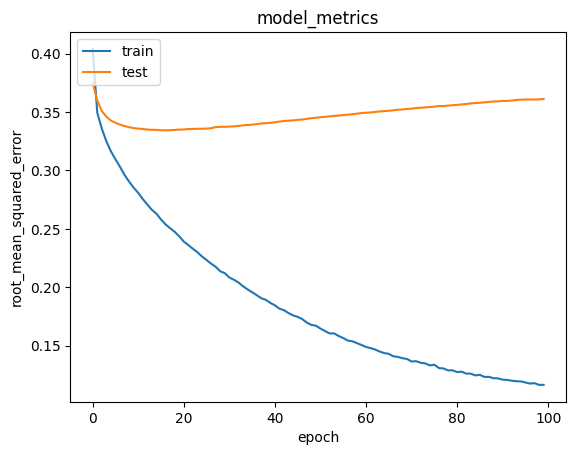

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()